# Este es un análisis exploratorio de datos de sombras de agujeros negros

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [1]:
#Cargamos el directorio donde se encuentran los datos
import os
os.chdir('/Users/benx/Documents/PythonCodes/AstronomicalData/')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Cargamos los datos de black holes

In [2]:
bh_names=['Redshift', 'Masa', 'Radio', 'Log_Masa', 'Log_Radio'] #Nombramos las columnas
bh_df= pd.read_csv('datos_bh_log.csv', sep=',', names=bh_names) #Cargamos el archivo como un dataframe
bh_df = bh_df.drop(['Log_Masa', 'Log_Radio'], axis=1) #Eliminamos columnas del dataframe (más no del archivo)

In [3]:
bh_df.info() #Información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Redshift  600 non-null    float64
 1   Masa      600 non-null    float64
 2   Radio     600 non-null    float64
dtypes: float64(3)
memory usage: 14.2 KB


In [4]:
bh_df.head() #Visualizamos los primeros 5 records

,Redshift,Masa,Radio
0,0.362261,525099.630096,2.693488e-05
1,0.832491,82.513311,2.780540e-09
2,0.493510,767426.116090,3.269210e-05
3,0.223230,22.646950,1.639466e-09
4,0.455419,781322.739897,3.482530e-05


In [5]:
max(bh_df['Radio'])

0.0009111069253777

In [7]:
logdat = ['Redshift','Log_Masa','Log_Radio']
dat = ['Redshift','Masa','Radio']

/Users/benx/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benx/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benx/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


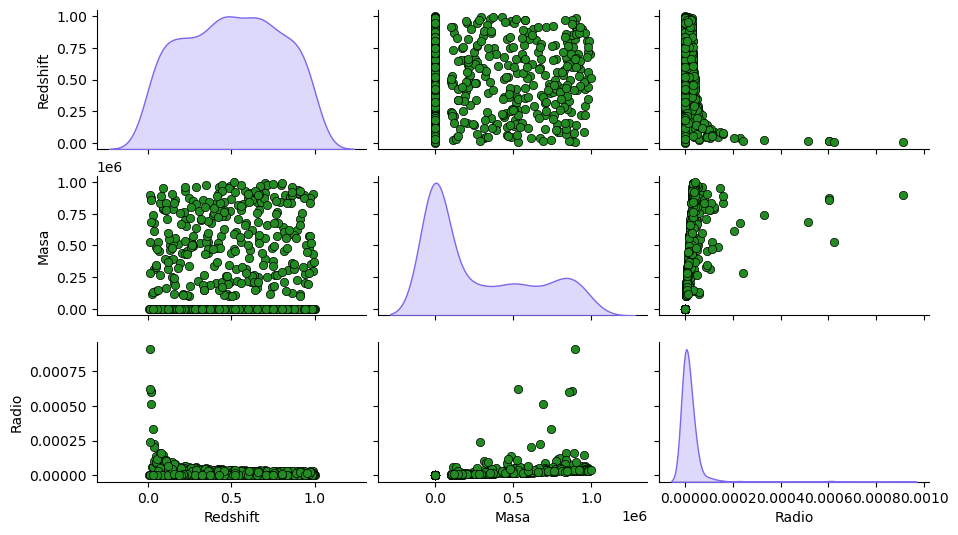

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cambiar el color de los gráficos de dispersión y las distribuciones diagonales
pp = sns.pairplot(bh_df[dat], 
                  height=1.8, 
                  aspect=1.8, 
                  plot_kws=dict(edgecolor="k", linewidth=0.5, color="forestgreen"),  # Color de los puntos en dispersión
                  diag_kind="kde", 
                  diag_kws=dict(fill=True, color="mediumslateblue"))  # Color de la distribución en diagonal

# Ajustar el tamaño de fuente de los ejes
plt.tick_params(axis='both', labelsize=5)  # Ajusta el valor 14 al tamaño deseado

# Guardar la imagen y mostrarla
pp.savefig("pp_bh_log.png")
plt.show()


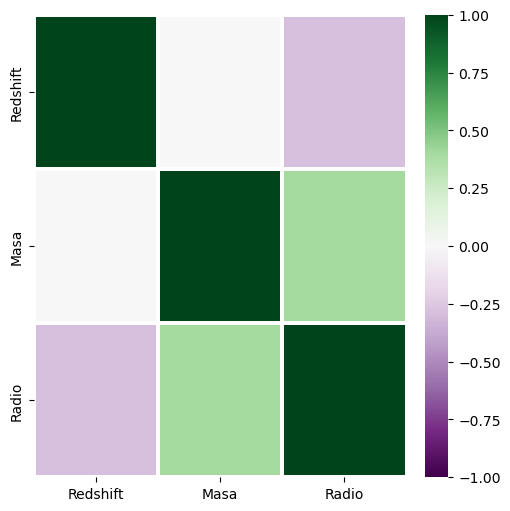

In [11]:
fig = plt.figure(constrained_layout=True, figsize = (5,5))

sns.heatmap(bh_df[dat].corr(),vmin=-1,vmax=1, annot=False,cmap="PRGn",linewidths=1.5)# 
plt.savefig('corrmap_bh.png')

#### La ecuacion del radio de un agujero negro en bajo redshift es $\alpha_{LR} = \frac{3\sqrt{3}H_0}{c} \frac{m}{z}~.$ donde $m$ es la cantidad $GM/c^2$
#### podemos reescribir la ecuacion como $ln(\alpha) = ln(3\sqrt{3})+ln(H_0)-ln(c) + ln(m) - ln(z)$

In [12]:
df_k4=pd.DataFrame()

In [13]:
c=3*10**8
H0 = 73200
Ms=2*10**30
G = 6.674*(10**(-11))
constmass= G*Ms/c**2
esc= (10**6)*206265/(3.086*10**22)


In [14]:
np.log((3*np.sqrt(3)*G*H0/c**3))

-69.13922660751518

In [15]:
bh_df_lr = bh_df[ bh_df['Redshift'] < 0.05]


In [16]:
bh_df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 36 to 579
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Redshift  31 non-null     float64
 1   Masa      31 non-null     float64
 2   Radio     31 non-null     float64
dtypes: float64(3)
memory usage: 992.0 bytes


In [17]:
df_k4['Log_Redshift']=(bh_df_lr['Redshift']).apply(np.log10)
df_k4['Log_Masa']=(bh_df_lr['Masa']).apply(lambda masa: masa*Ms).apply(np.log10)
df_k4['Log_Radio']=(bh_df_lr['Radio']).apply(lambda radio: radio/esc).apply(np.log10)


In [18]:
df_k4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 36 to 579
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Log_Redshift  31 non-null     float64
 1   Log_Masa      31 non-null     float64
 2   Log_Radio     31 non-null     float64
dtypes: float64(3)
memory usage: 992.0 bytes


In [19]:
df_k4=df_k4.dropna()

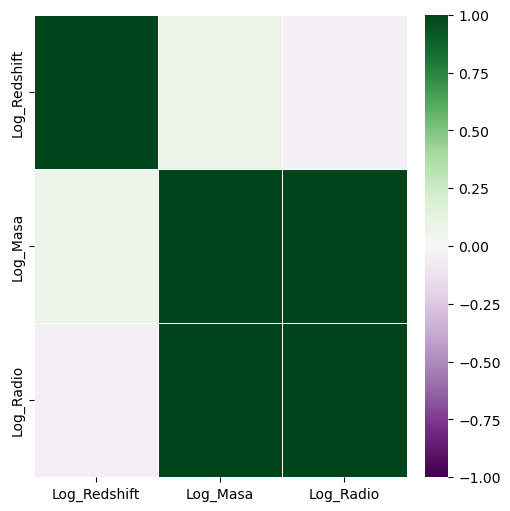

In [20]:
fig = plt.figure(constrained_layout=True, figsize = (5,5))

sns.heatmap(df_k4.corr(),vmin=-1,vmax=1, annot=False,cmap="PRGn",linewidths=0.5)# annot=True, fmt=".2f",cmap='Blues')
plt.savefig('corrmap_bh_log.png')

In [21]:
X=df_k4[['Log_Redshift','Log_Masa']] # Independent Variables
y=df_k4['Log_Radio'] # Dependent Variable

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True)


In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([-0.97420659,  0.99991841])

In [25]:
log_const=lr.intercept_
log_const

-29.96674298190229

In [26]:
ln_radio_pred=lr.predict(X)


In [27]:
ln_radio_pred


array([7.95777726, 8.13490228, 6.9638345 , 4.00904259, 7.95675224,
       6.77191671, 7.53433334, 3.45117882, 7.31346477, 3.60222347,
       3.78336597, 7.48851967, 6.93979545, 3.53368119, 3.49057583,
       7.9685773 , 7.18860169, 3.93693249, 3.6141543 , 3.01971293,
       2.91408518, 3.16934526, 7.69523284, 3.56139682, 3.40236181,
       7.14409496, 3.61723151, 7.88785407, 3.72326553, 7.56204393,
       3.18410433])

Text(0, 0.5, 'Log $\\alpha$')

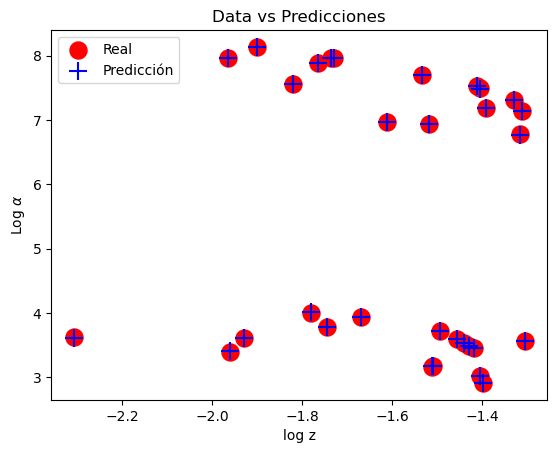

In [28]:
plt.scatter(X['Log_Redshift'],y,c='r',marker='o', s=150, label='Real')
plt.scatter(X['Log_Redshift'],ln_radio_pred,c='b',marker='+', s= 150, label='Predicción')
plt.title('Data vs Predicciones')
plt.legend()
plt.xlabel(r'log z')
plt.ylabel(r'Log $\alpha$')


In [29]:
wt=[1.0,-1.000,1.0]
log_c=df_k4.iloc[:,:].mul(wt, axis=1).sum(axis=1)
     

In [30]:
df_k4.iloc[:,:]


,Log_Redshift,Log_Masa,Log_Radio
36,-1.728397,36.243662,7.956117
66,-1.900531,36.253093,8.134540
68,-1.610775,35.364235,6.962044
71,-1.780642,32.243703,4.007317
76,-1.735872,36.235353,7.955121
78,-1.315832,35.459660,6.774596
86,-1.410302,36.130098,7.534741
107,-1.417714,32.039389,3.451111
122,-1.329407,35.988027,7.315789
191,-1.455480,32.153652,3.601526


In [31]:
g_const=log_c.apply(lambda x:np.exp(x)*c**3/(3*np.sqrt(3)*H0))


In [32]:
g_const
g_const.min()


6491317.019498442

In [33]:
df_k4

,Log_Redshift,Log_Masa,Log_Radio
36,-1.728397,36.243662,7.956117
66,-1.900531,36.253093,8.134540
68,-1.610775,35.364235,6.962044
71,-1.780642,32.243703,4.007317
76,-1.735872,36.235353,7.955121
78,-1.315832,35.459660,6.774596
86,-1.410302,36.130098,7.534741
107,-1.417714,32.039389,3.451111
122,-1.329407,35.988027,7.315789
191,-1.455480,32.153652,3.601526


In [34]:
g_filtered = g_const[ g_const < 7.5e4]
#g_filtered2 = g_filtered[ g_filtered > 3e11]


In [35]:
len(g_filtered)


0

[Text(0, 0.5, 'Frequencia')]

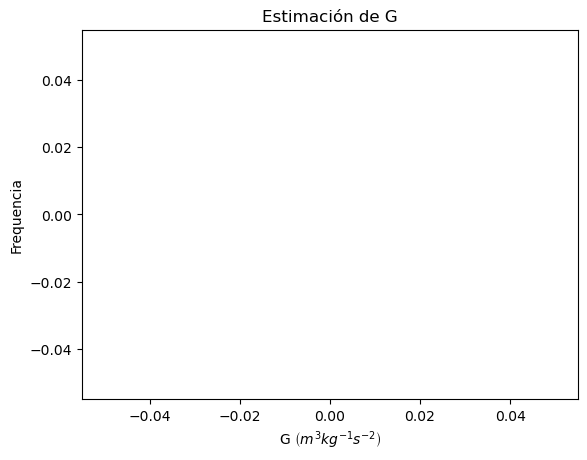

In [36]:
ax=sns.histplot(g_filtered)
ax.set_title ('Estimación de G')
ax.set(xlabel=r'G$~\left({m}^3 {kg}^{-1} {s}^{-2}\right)$')
ax.set(ylabel='Frequencia')

In [37]:
g_filtered.mean

<bound method Series.mean of Series([], dtype: float64)>

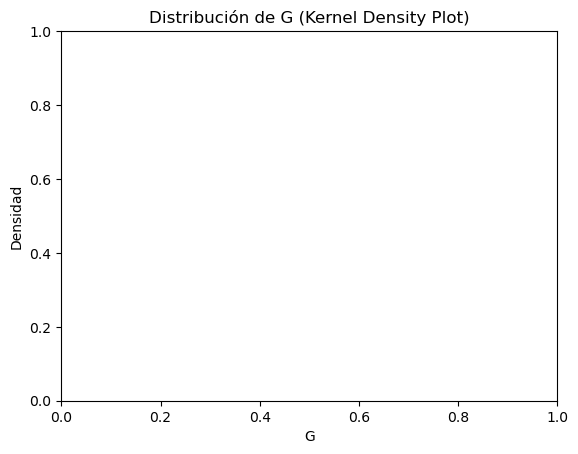

In [38]:

sns.kdeplot(g_filtered, color='steelblue', linewidth=1.0 , bw_method=1,fill=True)
#plt.xscale('log')  # Escala logarítmica en el eje x
#custom_ticks = [10, 100, 1000]
#plt.xticks(custom_ticks, custom_ticks)
plt.xlabel('G')
plt.ylabel('Densidad')
plt.title('Distribución de G (Kernel Density Plot)')
plt.show()


In [39]:
g_filtered.skew(),g_filtered.kurtosis()


(nan, nan)

In [40]:
print(f'The estimate for the Gravitational constant using the BlackHoles Data is {g_filtered.mean()} +/- {g_filtered.std()}')
     


The estimate for the Gravitational constant using the BlackHoles Data is nan +/- nan


/Users/benx/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0.5, 'Frequencia')]

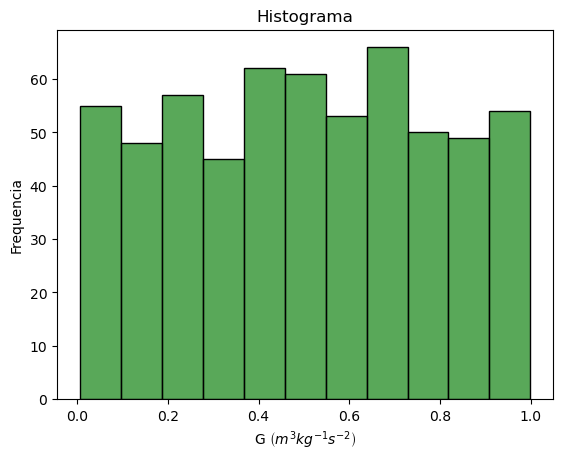

In [41]:
redshift_lr = bh_df['Redshift']
ax=sns.histplot(redshift_lr, color='forestgreen')
ax.set_title ('Histograma')

ax.set(xlabel=r'G$~\left({m}^3 {kg}^{-1} {s}^{-2}\right)$')
ax.set(ylabel='Frequencia')

### Visualizamos los datos "crudos"

### Ahora visualizamos los datos aplicando una transformación logaritmica en los ejes

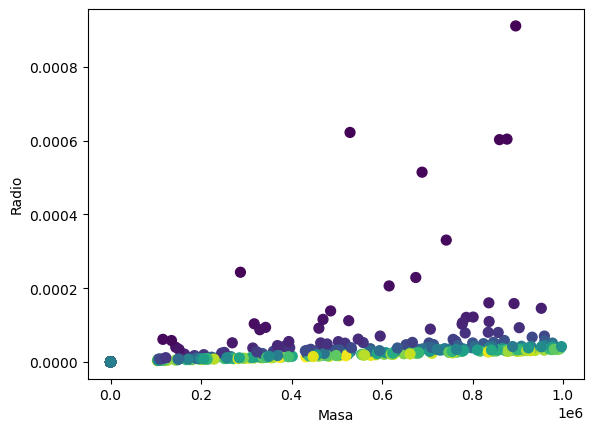

In [40]:
shadows = plt.scatter(bh_df['Masa'],bh_df['Radio'],  c = bh_df['Redshift'], s = 50 , label='shadows')
plt.xlabel('Masa')
plt.ylabel('Radio')
plt.savefig('cmap_bh.png')

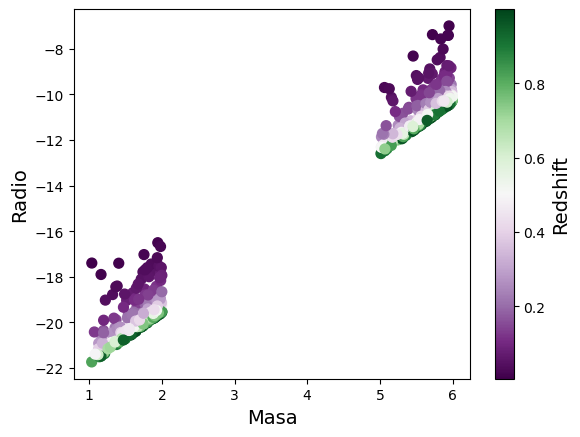

In [42]:
import matplotlib.pyplot as plt

# Gráfico de dispersión con escala de colores
shadows = plt.scatter(np.log10(bh_df['Masa']), np.log(bh_df['Radio']), c=bh_df['Redshift'], s=50, cmap='PRGn', label='shadows')

# Etiquetas de los ejes
plt.xlabel('Masa', fontsize=14)
plt.ylabel('Radio', fontsize=14)

# Escala de colores
cbar = plt.colorbar(shadows)
cbar.set_label('Redshift', fontsize=14)  # Etiqueta para la escala de colores

# Guardar el gráfico
plt.savefig('cmap_bh_redshift.png')
# Mostrar el gráfico
plt.show()


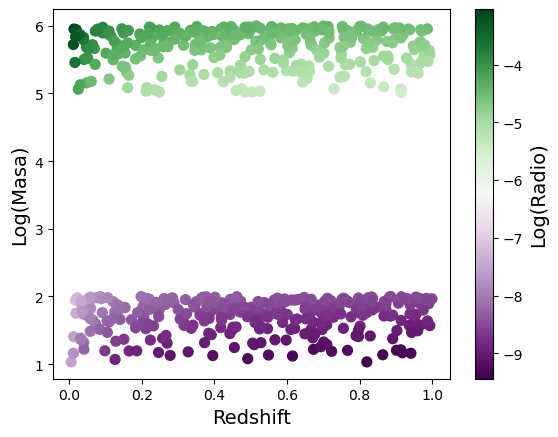

In [43]:
import matplotlib.pyplot as plt

# Gráfico de dispersión con escala de colores
shadows = plt.scatter(bh_df['Redshift'], np.log10(bh_df['Masa']), c=np.log10(bh_df['Radio']), s=50, cmap='PRGn', label='shadows')

# Etiquetas de los ejes
plt.xlabel('Redshift', fontsize=14)
plt.ylabel('Log(Masa)', fontsize=14)

# Escala de colores
cbar = plt.colorbar(shadows)
cbar.set_label('Log(Radio)', fontsize=14)  # Etiqueta para la escala de colores

# Guardar el gráfico
plt.savefig('cmap_bh_radio.png')
# Mostrar el gráfico
plt.show()


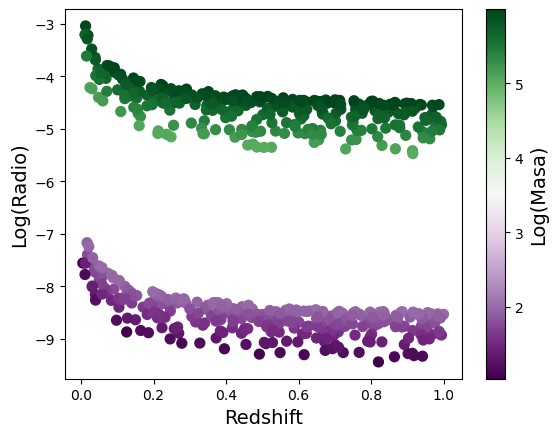

In [44]:
import matplotlib.pyplot as plt

# Gráfico de dispersión con escala de colores
shadows = plt.scatter(bh_df['Redshift'], np.log10(bh_df['Radio']), c=np.log10(bh_df['Masa']), s=50, cmap='PRGn', label='shadows')

# Etiquetas de los ejes
plt.xlabel('Redshift', fontsize=14)
plt.ylabel('Log(Radio)', fontsize=14)

# Escala de colores
cbar = plt.colorbar(shadows)
cbar.set_label('Log(Masa)', fontsize=14)  # Etiqueta para la escala de colores

# Guardar el gráfico
plt.savefig('cmap_bh_masa.png')
# Mostrar el gráfico
plt.show()


### Lo anterior es equivalente a visualizar el logaritmo de los datos

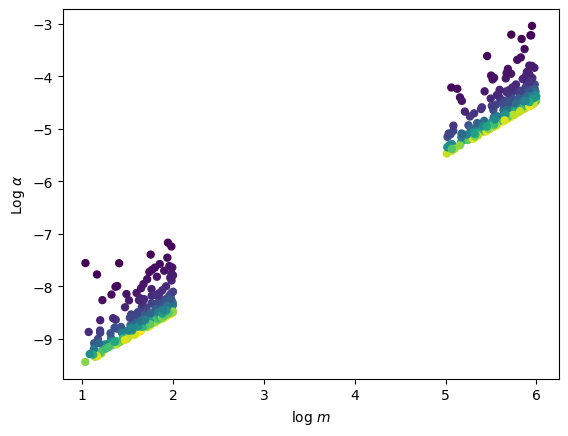

In [45]:
shadows_log = plt.scatter( np.log10(bh_df['Masa']),np.log10(bh_df['Radio']), c = bh_df['Redshift'], s = 25, label='shadows')
plt.xlabel('log $m$')
plt.ylabel(r'Log $\alpha$')

plt.savefig('cmap_bh_redshift2.png')

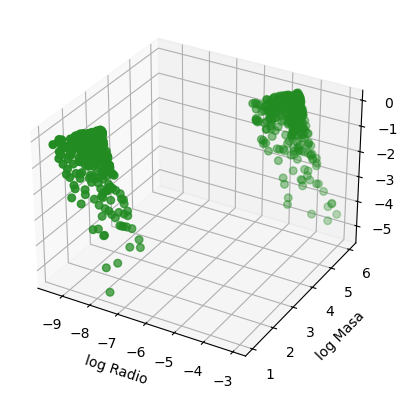

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos
x = np.log10(bh_df['Radio'])
y = np.log10(bh_df['Masa'])
z = np.log(bh_df['Redshift'])

# Crear la gráfica 3D
scatter = ax.scatter(x, y, z, c='forestgreen', s=30)

# Etiquetas de los ejes
ax.set_xlabel('log Radio')
ax.set_ylabel('log Masa')
ax.set_zlabel('Log z')



# Guardar la figura
plt.savefig('3D_bh_redshift.png')

# Mostrar la gráfica
plt.show()


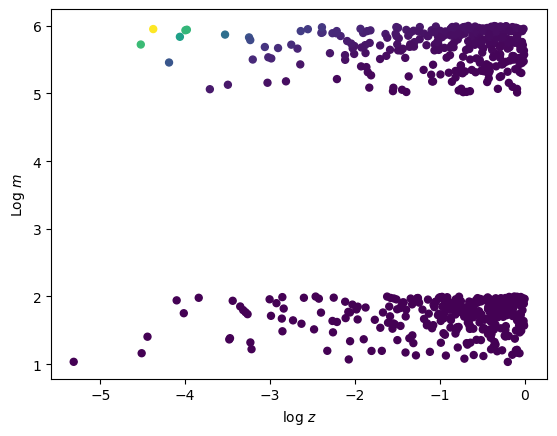

In [94]:
shadows_log = plt.scatter(np.log(bh_df['Redshift']),np.log10(bh_df['Masa']),  c = bh_df['Radio'], s = 25, label='shadows')
plt.xlabel('log $z$')
plt.ylabel(r'Log $m$')

plt.savefig('cmap_bh_radio.png')

## De las gráficas anteriores, se tiene que los datos crudos son dificiles de catalogar, no hay a simple vista grupos bien definidos. Sin embargo, al aplicar una transformación (en este caso, tomar el logaritmo) se forman claramente dos grupos diferentes en los datos.

### La pregunta es, ¿podemos obtener estos mismos dos grupos a partir de los datos crudos, con algun método de clusterización?

### Probemos primero con k-means:

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [85]:
datos = [bh_df['Masa'],bh_df['Radio']]

In [86]:
# Especificamos el número de clusters (k)
k = 2

# Creamos el modelo K-means, incluido en sklearn.cluster
modelo_kmeans = KMeans(n_clusters=k)

# Entrenamos del modelo
modelo_kmeans.fit(datos)


/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [87]:
# Obtenemos las etiquetas de los clusters para cada punto de datos
etiquetas = modelo_kmeans.labels_

# Obtenemos las coordenadas de los centroides de los clusters
centroides = modelo_kmeans.cluster_centers_


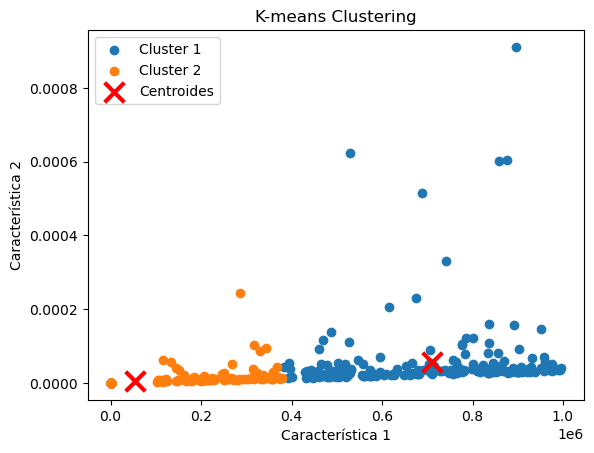

In [123]:
import numpy as np

# Asegúrate de que etiquetas es un array NumPy
etiquetas = np.array(etiquetas)

# Verifica que datos y etiquetas tengan la misma cantidad de filas
if len(etiquetas) != datos.shape[0]:
    raise ValueError("El número de etiquetas no coincide con el número de filas en los datos.")

# Visualizamos los datos y los clusters
for i in range(k):
    grupo = datos[etiquetas == i]  # Selecciona las filas donde la etiqueta coincide
    plt.scatter(grupo[:, 0], grupo[:, 1], label=f'Cluster {i + 1}')

# Mostramos los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroides')

# Configuración de estilo
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


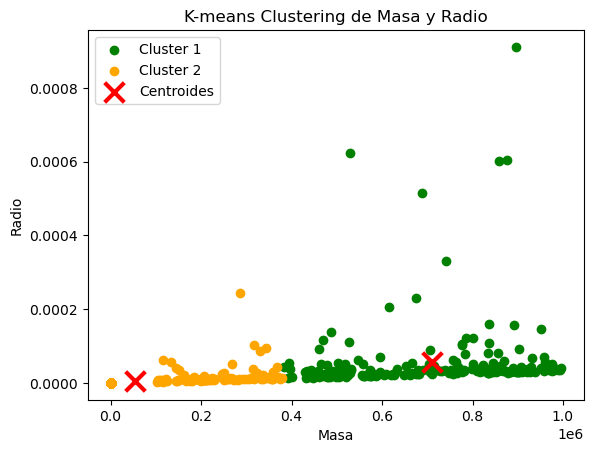

In [102]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Selecciona las columnas de interés
columnas_interes = ['Masa', 'Radio']
datos_seleccionados = bh_df[columnas_interes]

# Convierte los datos seleccionados a una matriz NumPy
datos_np = datos_seleccionados.values

# Especifica el número de clusters (k)
k = 2

# Crea el modelo K-means
modelo_kmeans = KMeans(n_clusters=k, random_state=42)

# Entrenamiento del modelo
modelo_kmeans.fit(datos_np)

# Obtiene las etiquetas de los clusters para cada punto de datos
etiquetas = modelo_kmeans.labels_

# Obtiene las coordenadas de los centroides de los clusters
centroides = modelo_kmeans.cluster_centers_

# Lista de colores personalizada para los clusters
colores = ['green', 'orange']  # Cambia los colores según prefieras

# Visualiza los datos y los clusters
for i in range(k):
    grupo = datos_np[etiquetas == i]
    plt.scatter(grupo[:, 0], grupo[:, 1], color=colores[i], label=f'Cluster {i + 1}')

# Muestra los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroides')

# Configuración adicional del gráfico
plt.xlabel('Masa')
plt.ylabel('Radio')
plt.title('K-means Clustering de Masa y Radio')
plt.legend()
plt.show()


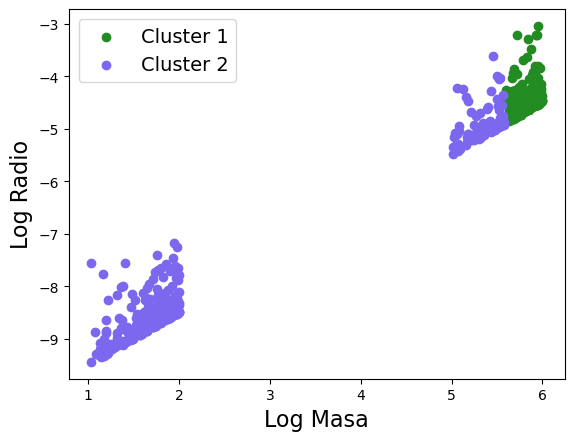

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista de colores personalizada para los clusters
colores = ['forestgreen', 'mediumslateblue']  # Colores para cada cluster

# Visualiza los datos y los clusters
for i in range(k):
    grupo = datos_np[etiquetas == i]
    plt.scatter(np.log10(grupo[:, 0]), np.log10(grupo[:, 1]), color=colores[i], label=f'Cluster {i + 1}')

# Muestra los centroides
#plt.scatter(np.log(centroides[:, 0]), np.log(centroides[:, 1]), marker='x', s=200, linewidths=3, color='red', label='Centroides')

# Configuración adicional del gráfico
plt.xlabel('Log Masa', fontsize=16)
plt.ylabel(r'Log Radio', fontsize=16)
#plt.title('K-means', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('kmeans_bh_nolog.png')
plt.show()


/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/benx/anaconda3/li

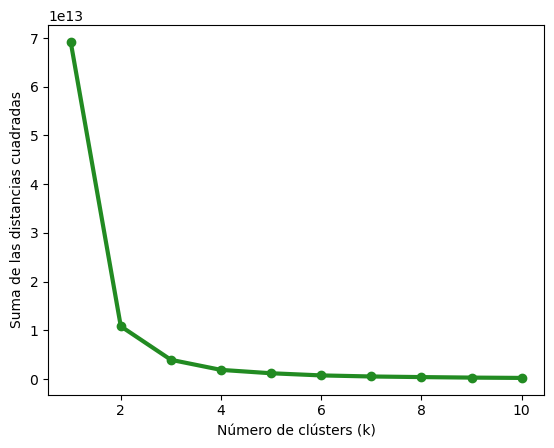

In [116]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def encontrar_k_optimo(X, max_k):
    distancias_cuadradas = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distancias_cuadradas.append(kmeans.inertia_)

    return distancias_cuadradas

def graficar_codo(distancias_cuadradas):
    plt.plot(range(1, len(distancias_cuadradas) + 1), distancias_cuadradas, marker='o', color='forestgreen', lw=3)
    plt.xlabel('Número de clústers (k)')
    plt.ylabel('Suma de las distancias cuadradas')
    #plt.title('Método del codo')
    plt.savefig('codo_bh.png')
    plt.show()


max_k = 10  # Puedes ajustar este valor según tus necesidades
distancias_cuadradas = encontrar_k_optimo(datos_np , max_k)
graficar_codo(distancias_cuadradas)

/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


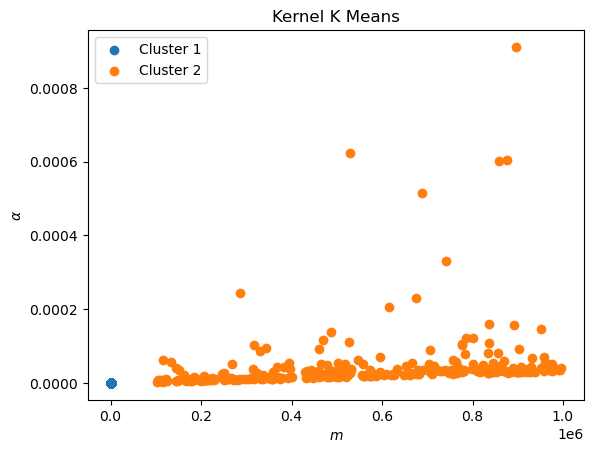

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_kernels


# Selecciona las columnas de interés
columnas_interes = ['Masa', 'Radio']
datos = bh_df[columnas_interes].values

# Escala los datos para que tengan media cero y desviación estándar uno
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(datos)

# Especifica el número de clusters (k)
k = 2

# Especifica el tipo de kernel (RBF kernel en este caso)
kernel = 'rbf'

# Calcula la matriz de kernel
matriz_kernel = pairwise_kernels(datos_escalados, metric=kernel)

# Crea el modelo Spectral Clustering
modelo_spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')

# Entrenamiento del modelo
etiquetas_spectral = modelo_spectral.fit_predict(matriz_kernel)

# Visualiza los datos y los clusters
for i in range(k):
    grupo = datos[etiquetas_spectral == i]
    plt.scatter(grupo[:, 0], grupo[:, 1], label=f'Cluster {i + 1}')

# Configuración adicional del gráfico
plt.xlabel('$m$')
plt.ylabel(r'$\alpha$')
plt.title('Kernel K Means')
plt.savefig('k-kmeans_bh.png')
plt.legend()
plt.show()


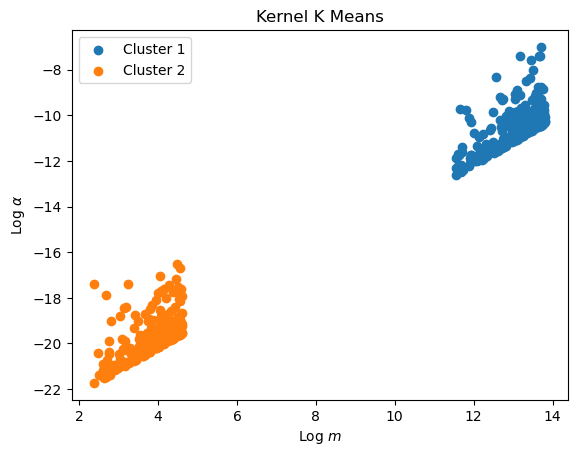

In [118]:
# Visualiza los datos y los clusters
for i in range(k):
    grupo = datos[etiquetas_spectral == i]
    plt.scatter(np.log(grupo[:, 0]), np.log(grupo[:, 1]),label=f'Cluster {i + 1}')

#plt.scatter(np.log(centroides[:, 0]), np.log(centroides[:, 1]), marker='x', s=200, linewidths=3, color='r', label='Centroides')


# Configuración adicional del gráfico
plt.xlabel('Log $m$')
plt.ylabel(r'Log $\alpha$')
plt.title('Kernel K Means')
plt.savefig('k_kmeans_bh_log.png')
plt.legend()
plt.show()


/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


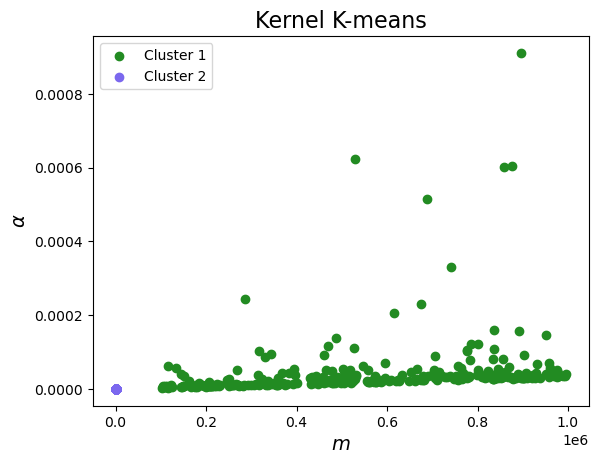

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_kernels

# Selecciona las columnas de interés
columnas_interes = ['Masa', 'Radio']
datos = bh_df[columnas_interes].values

# Escala los datos para que tengan media cero y desviación estándar uno
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(datos)

# Especifica el número de clusters (k)
k = 2

# Especifica el tipo de kernel (RBF kernel en este caso)
kernel = 'rbf'

# Calcula la matriz de kernel
matriz_kernel = pairwise_kernels(datos_escalados, metric=kernel)

# Crea el modelo Spectral Clustering
modelo_spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)

# Entrenamiento del modelo
etiquetas_spectral = modelo_spectral.fit_predict(matriz_kernel)

# Lista de colores personalizada para los clusters
colores = ['forestgreen', 'mediumslateblue']

# Visualiza los datos y los clusters
for i in range(k):
    grupo = datos[etiquetas_spectral == i]
    plt.scatter(grupo[:, 0], grupo[:, 1], color=colores[i], label=f'Cluster {i + 1}')

# Configuración adicional del gráfico
plt.xlabel('$m$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
plt.title('Kernel K-means', fontsize=16)
plt.legend()
plt.savefig('k-kmeans_bh.png')
plt.show()


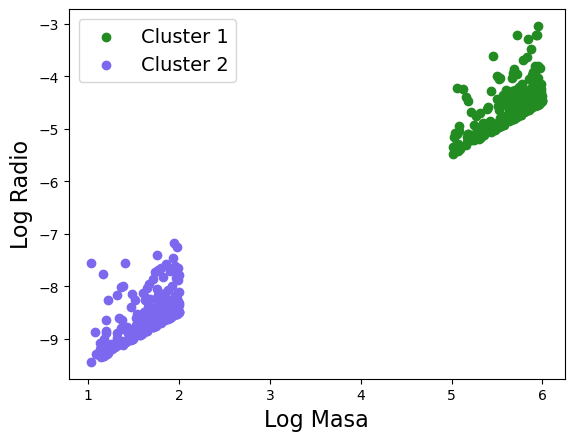

In [137]:
# Lista de colores personalizada para los clusters
colores = ['forestgreen', 'mediumslateblue']

# Visualiza los datos y los clusters
for i in range(k):
    grupo = datos[etiquetas_spectral == i]
    plt.scatter(np.log10(grupo[:, 0]), np.log10(grupo[:, 1]), color=colores[i], label=f'Cluster {i + 1}')

# Configuración adicional del gráfico
plt.xlabel('Log Masa', fontsize=16)
plt.ylabel(r'Log Radio', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('k_kmeans_bh_log.png')
plt.show()


/Users/benx/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


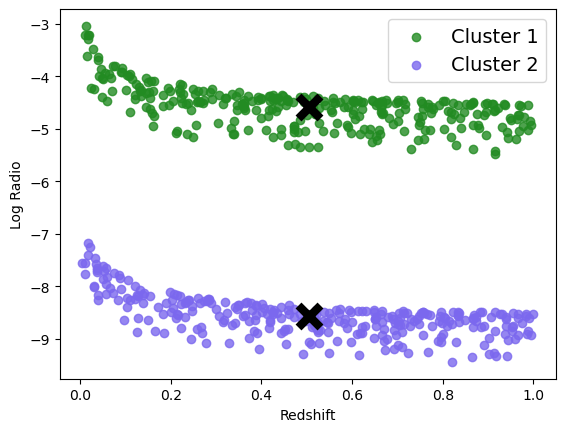

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Transformamos las columnas Masa y Radio a log10
bh_df['Log_Masa'] = np.log10(bh_df['Masa'])
bh_df['Log_Radio'] = np.log10(bh_df['Radio'])

# Seleccionamos las columnas para clustering (Log_Masa y Log_Radio)
datos_log = bh_df[['Log_Masa', 'Log_Radio']].values

# Especificamos el número de clusters
k = 2

# Realizamos el clustering con KMeans
modelo_kmeans = KMeans(n_clusters=k, random_state=42)
etiquetas = modelo_kmeans.fit_predict(datos_log)
centroides = modelo_kmeans.cluster_centers_

# Visualizamos los resultados en el gráfico
colores = ['forestgreen', 'mediumslateblue']
for i in range(k):
    grupo = bh_df[etiquetas == i]
    plt.scatter(grupo['Redshift'], grupo['Log_Radio'], color=colores[i], label=f'Cluster {i + 1}', alpha=0.8)

# Mostramos los centroides en el gráfico (transformados a ejes actuales)
for i, centroide in enumerate(centroides):
    plt.scatter(np.mean(bh_df['Redshift']), centroide[1], marker='x', s=250, linewidths=6, color='k')

# Configuración adicional del gráfico
plt.xlabel('Redshift')
plt.ylabel('Log Radio')
plt.legend(fontsize=14, loc='best')
plt.savefig('kmeans_bh.png')
plt.show()
